In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
x = data.drop("price",axis=1)
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
y = data["price"]
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

### One Hot encoding for categorical columns

In [6]:
x = pd.get_dummies(x, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus'], drop_first=True)


In [7]:
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
print(f"1. Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"2. Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"3. R-squared Score (R²): {r2:.4f}")

1. Mean Absolute Error (MAE): 970043.40
2. Mean Squared Error (MSE): 1754318687330.66
3. R-squared Score (R²): 0.6529


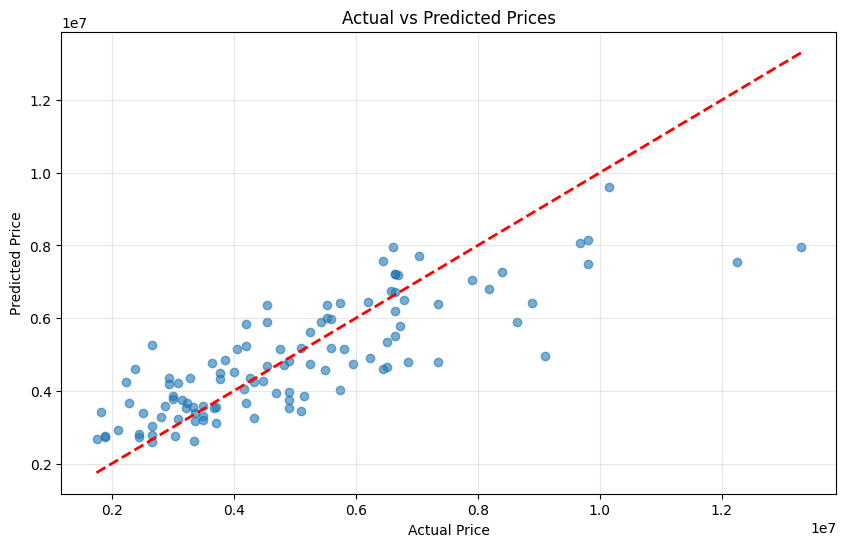

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
print("\n--- Model Coefficients ---")
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(coefficients)
print(f"\nIntercept: {model.intercept_:.2f}")
print("\nInterpretation:")
print("- Positive coefficients: increase in feature value → increase in price")
print("- Negative coefficients: increase in feature value → decrease in price")
print("- Larger absolute values: stronger impact on price prediction")


--- Model Coefficients ---
                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
12     furnishingstatus_unfurnished -4.136451e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
11  furnishingstatus_semi-furnished -1.268818e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02

Intercept: 260032.36

Interpretation:
- Positive coefficients: increase in feature value → increase in price
- Negative coefficients: increase in feature value → decrease in price
- Larger absolute values: stronger impact on price prediction
